# 서울시 연령대에 따른 운전자 비율과 사고율

### 서울시 데이터 EDA화의 목적
- 개요: 처음에는 전국 데이터를 수집하여 EDA화 하여 사고율 부분을 (사고건수)/(운전면허소지자)으로 표현하였으나, 대한민국의 주요 특징인 장롱면허 인구가 다수 존재할 가능성이 있기에, 이를 정확히 수치화 하려 하였으나 전국 연령별 자동차등록 통계가 존재하지 않아 서울시 데이터를 사용하여 사고율 부분을 (사고건수)/(자동차등록수)로 표현하기로 함.  

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'

## 연령대별 자동차 소지율

In [2]:
pop2020_seoul = pd.read_csv('C:/Users/NT900X3T-K58L/python/Data Science/project/data/pop2020_seoul.csv')
pop2020_seoul

,age,pop,license,car
0,0~20,416854,35984,2058
1,20~29,1524869,1046051,63276
2,30~39,1523209,1480919,449470
3,40~49,1564547,1775148,701029
4,50~59,1574076,1766102,725384
5,60~,2295236,1760338,755466


In [3]:
# 단위를 축소

pop2020_seoul['pop2'] = pop2020_seoul['pop']/1000
pop2020_seoul['license2'] = pop2020_seoul['license']/1000
pop2020_seoul['car2'] = pop2020_seoul['car']/1000
pop2020_seoul

,age,pop,license,car,pop2,license2,car2
0,0~20,416854,35984,2058,416.854,35.984,2.058
1,20~29,1524869,1046051,63276,1524.869,1046.051,63.276
2,30~39,1523209,1480919,449470,1523.209,1480.919,449.470
3,40~49,1564547,1775148,701029,1564.547,1775.148,701.029
4,50~59,1574076,1766102,725384,1574.076,1766.102,725.384
5,60~,2295236,1760338,755466,2295.236,1760.338,755.466


In [4]:
# 운전면허 소지율 추가
pop2020_seoul['운전면허소지율'] = pop2020_seoul['car']/pop2020_seoul['license']*100
pop2020_seoul

,age,pop,license,car,pop2,license2,car2,운전면허소지율
0,0~20,416854,35984,2058,416.854,35.984,2.058,5.719209
1,20~29,1524869,1046051,63276,1524.869,1046.051,63.276,6.049036
2,30~39,1523209,1480919,449470,1523.209,1480.919,449.470,30.350748
3,40~49,1564547,1775148,701029,1564.547,1775.148,701.029,39.491299
4,50~59,1574076,1766102,725384,1574.076,1766.102,725.384,41.072599
5,60~,2295236,1760338,755466,2295.236,1760.338,755.466,42.915963


<Figure size 3600x2400 with 0 Axes>

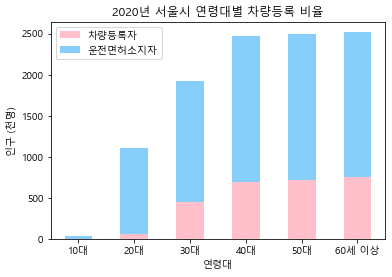

In [35]:
# 2020년 서울시 연령대별 차량등록 비율 그래프화

label = ['10대', '20대', '30대', '40대', '50대', '60세 이상']
index = np.arange(len(label))

plt.figure(figsize=(12, 8), dpi=300)
pop2020_seoul.plot(kind='bar', y=['car2', 'license2'], label=('차량등록자','운전면허소지자'), 
             stacked=True, color=['pink', 'lightskyblue'])
plt.title('2020년 서울시 연령대별 차량등록 비율')
plt.xlabel('연령대')
plt.ylabel('인구 (천명)')
plt.xticks(index, label, rotation=0)
plt.show()

In [6]:
print('10대 차량등록율: ', round(pop2020_seoul['운전면허소지율'][0], 2),'%')
print('20대 차량등록율: ', round(pop2020_seoul['운전면허소지율'][1], 2),'%')
print('30대 차량등록율: ', round(pop2020_seoul['운전면허소지율'][2], 2),'%')
print('40대 차량등록율: ', round(pop2020_seoul['운전면허소지율'][3], 2),'%')
print('50대 차량등록율: ', round(pop2020_seoul['운전면허소지율'][4], 2),'%')
print('60세 차량등록율: ', round(pop2020_seoul['운전면허소지율'][5], 2),'%')

10대 차량등록율:  5.72 %
20대 차량등록율:  6.05 %
30대 차량등록율:  30.35 %
40대 차량등록율:  39.49 %
50대 차량등록율:  41.07 %
60세 차량등록율:  42.92 %


### 결론
- 위의 그래프와 같이, 연령대가 높을수록 자동차 소유 비율이 높았습니다. 학생이거나 사회초년생 비율이 높은 20대의 자동차 소유 비율이 굉장히 낮았습니다.

## 연령대별 사고율

In [7]:
driver2020_seoul = pd.read_csv('C:/Users/NT900X3T-K58L/python/Data Science/project/data/driver2020_seoul.csv', encoding='cp949')
driver2020_seoul

,age,car,license,accident
0,10대,2058.0,35984.0,1304.0
1,20대,63276.0,1046051.0,4990.0
2,30대,449470.0,1480919.0,5825.0
3,40대,701029.0,1775148.0,5951.0
4,50대,725384.0,1766102.0,7926.0
5,60세 이상,755466.0,1760338.0,8423.0
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN


In [8]:
# NaN 값 제거

driver2020_seoul.dropna(inplace=True)

In [9]:
# 사고율([accident]/[car] * 100) 추가
# 사고율2([accident]/[license] * 100) 추가

driver2020_seoul['사고율'] = driver2020_seoul['accident']/driver2020_seoul['car']*100
driver2020_seoul['사고율2'] = driver2020_seoul['accident']/driver2020_seoul['license']*100
driver2020_seoul

,age,car,license,accident,사고율,사고율2
0,10대,2058.0,35984.0,1304.0,63.362488,3.623833
1,20대,63276.0,1046051.0,4990.0,7.886086,0.477032
2,30대,449470.0,1480919.0,5825.0,1.295971,0.393337
3,40대,701029.0,1775148.0,5951.0,0.848895,0.335240
4,50대,725384.0,1766102.0,7926.0,1.092663,0.448785
5,60세 이상,755466.0,1760338.0,8423.0,1.114941,0.478488


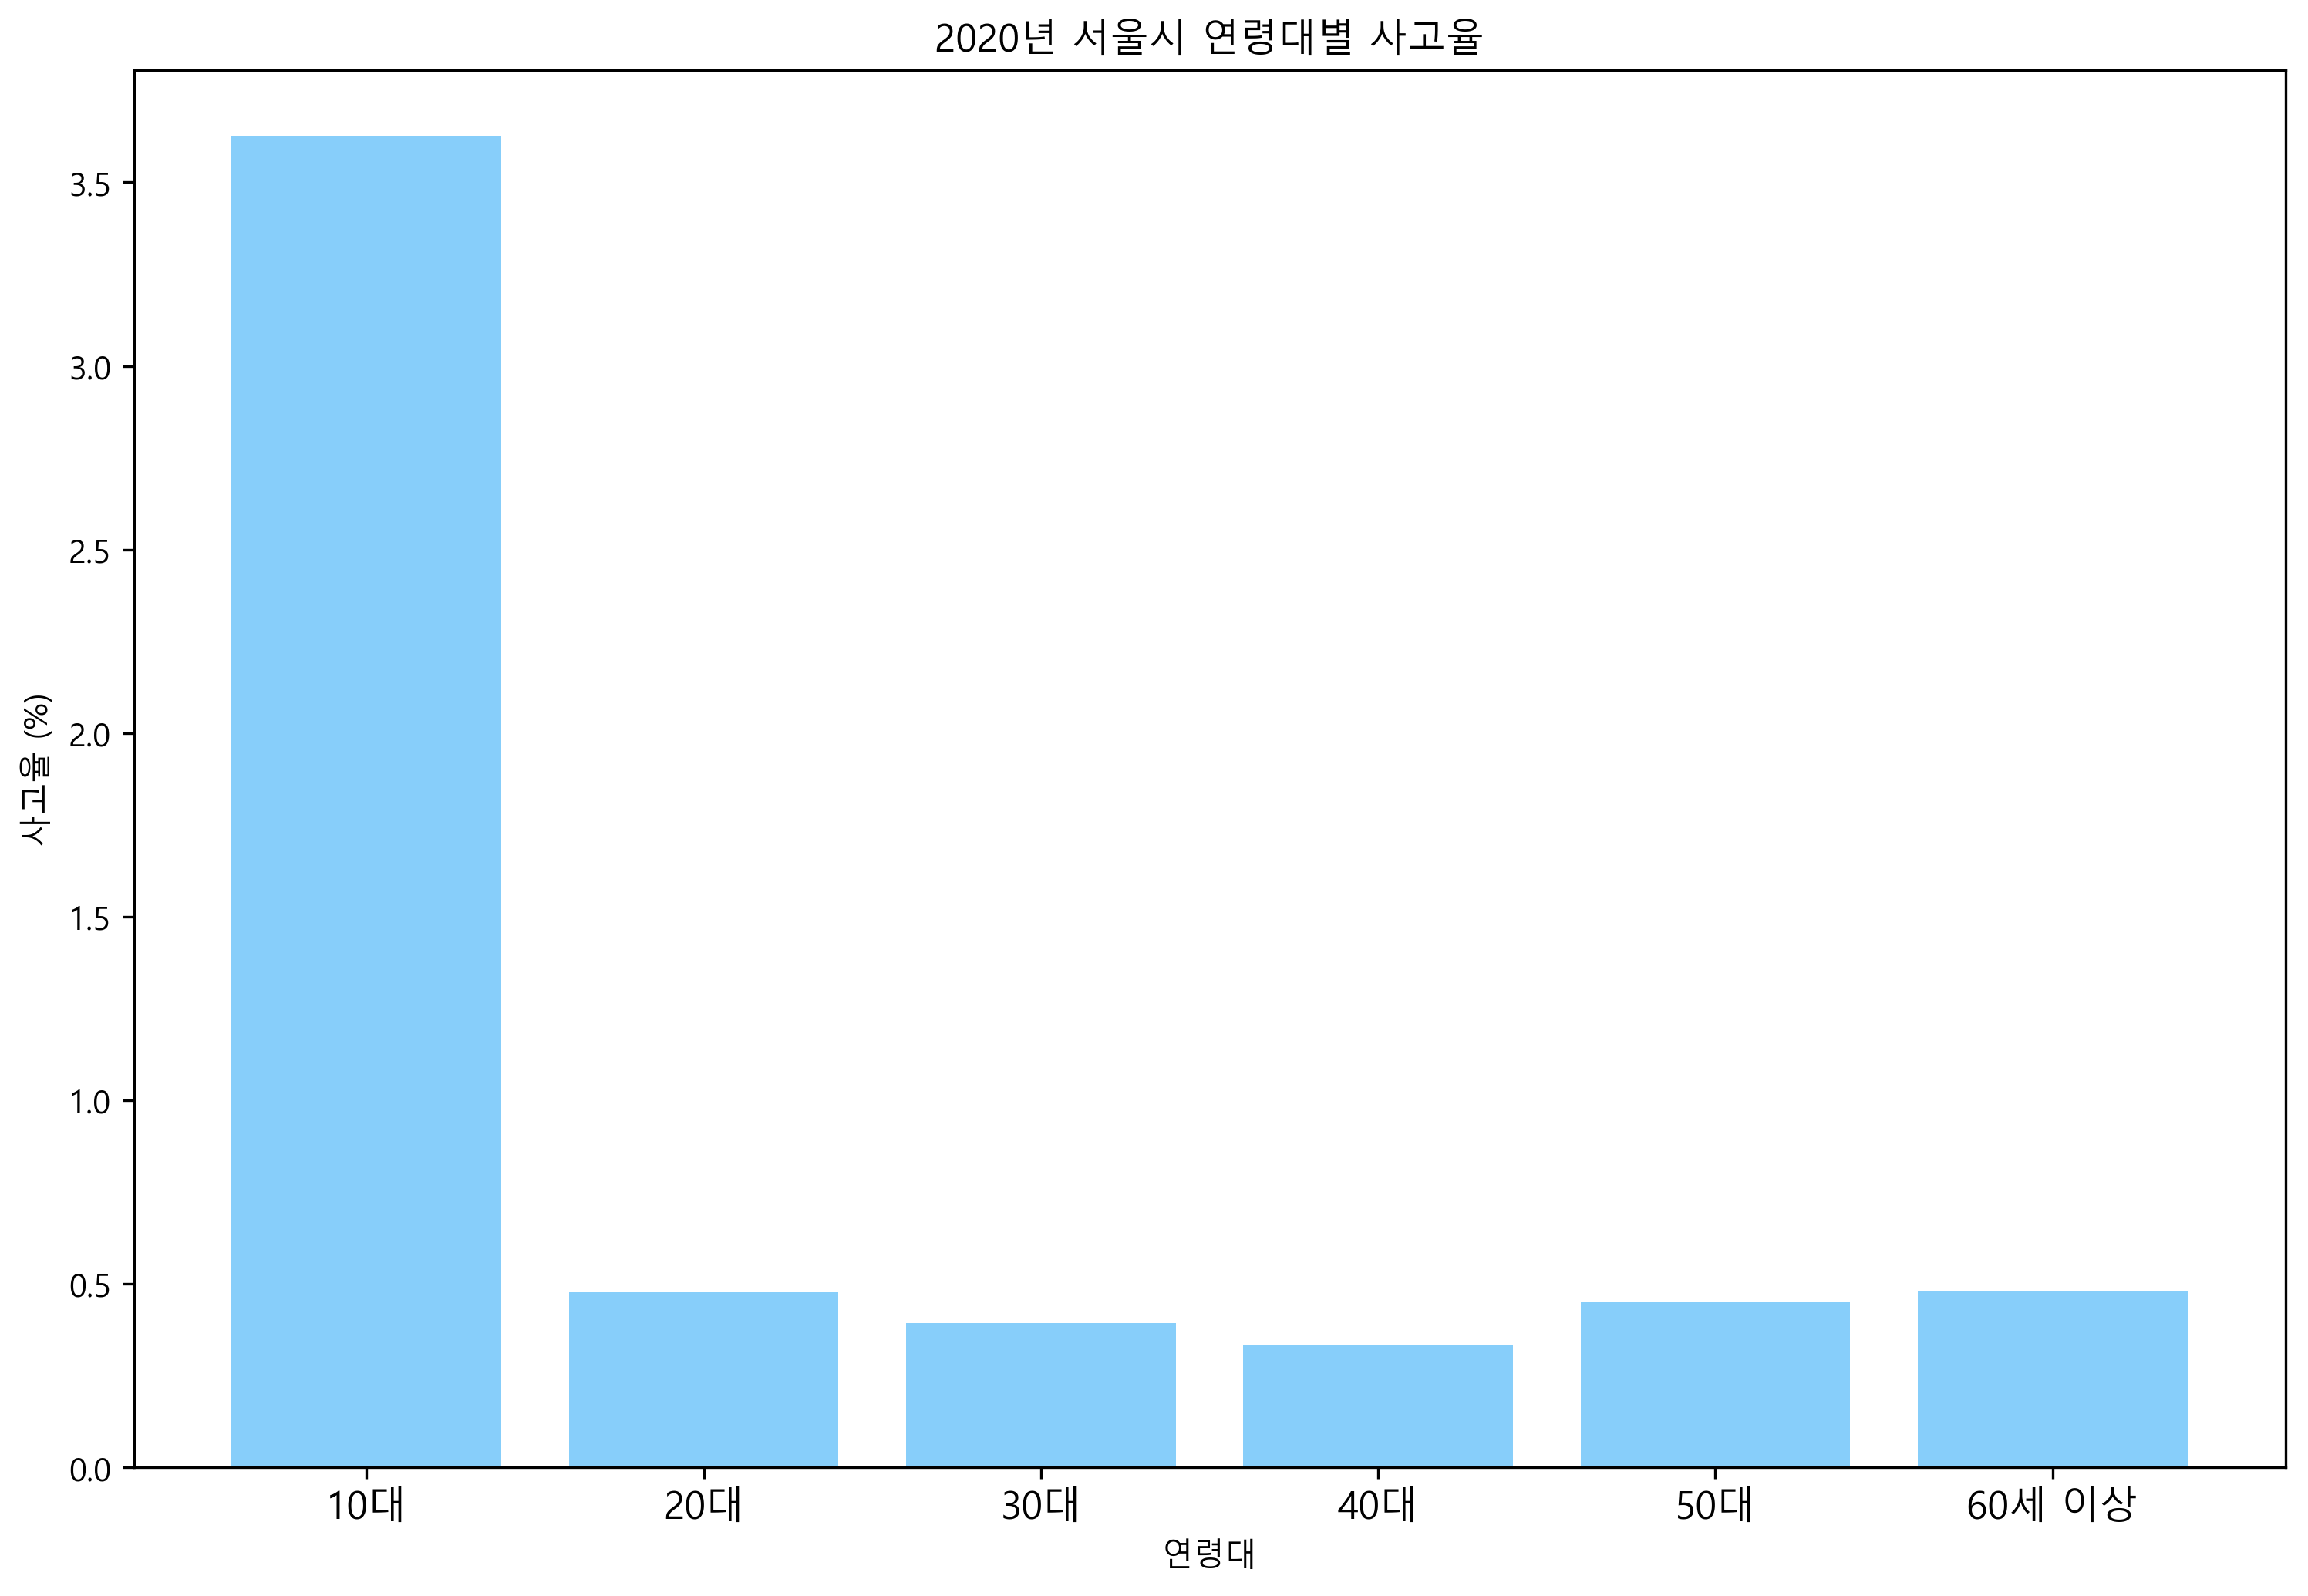

In [36]:
# 사고건수/운전면허소지자수

label = ['10대', '20대', '30대', '40대', '50대', '60세 이상']
index = np.arange(len(label))

plt.figure(figsize=(12, 8), dpi=300)
plt.bar(label, driver2020_seoul['사고율2'], color='lightskyblue')
plt.title('2020년 서울시 연령대별 사고율')
plt.xlabel('연령대')
plt.ylabel('사고율 (%)')
plt.xticks(index, label, rotation=0, fontsize=12)
plt.show()

In [11]:
print('10대: ', round(driver2020_seoul['사고율2'][0], 2),'%')
print('20대: ', round(driver2020_seoul['사고율2'][1], 2),'%')
print('30대: ', round(driver2020_seoul['사고율2'][2], 2),'%')
print('40대: ', round(driver2020_seoul['사고율2'][3], 2),'%')
print('50대: ', round(driver2020_seoul['사고율2'][4], 2),'%')
print('60세 이상: ', round(driver2020_seoul['사고율2'][5], 2),'%')

10대:  3.62 %
20대:  0.48 %
30대:  0.39 %
40대:  0.34 %
50대:  0.45 %
60세 이상:  0.48 %


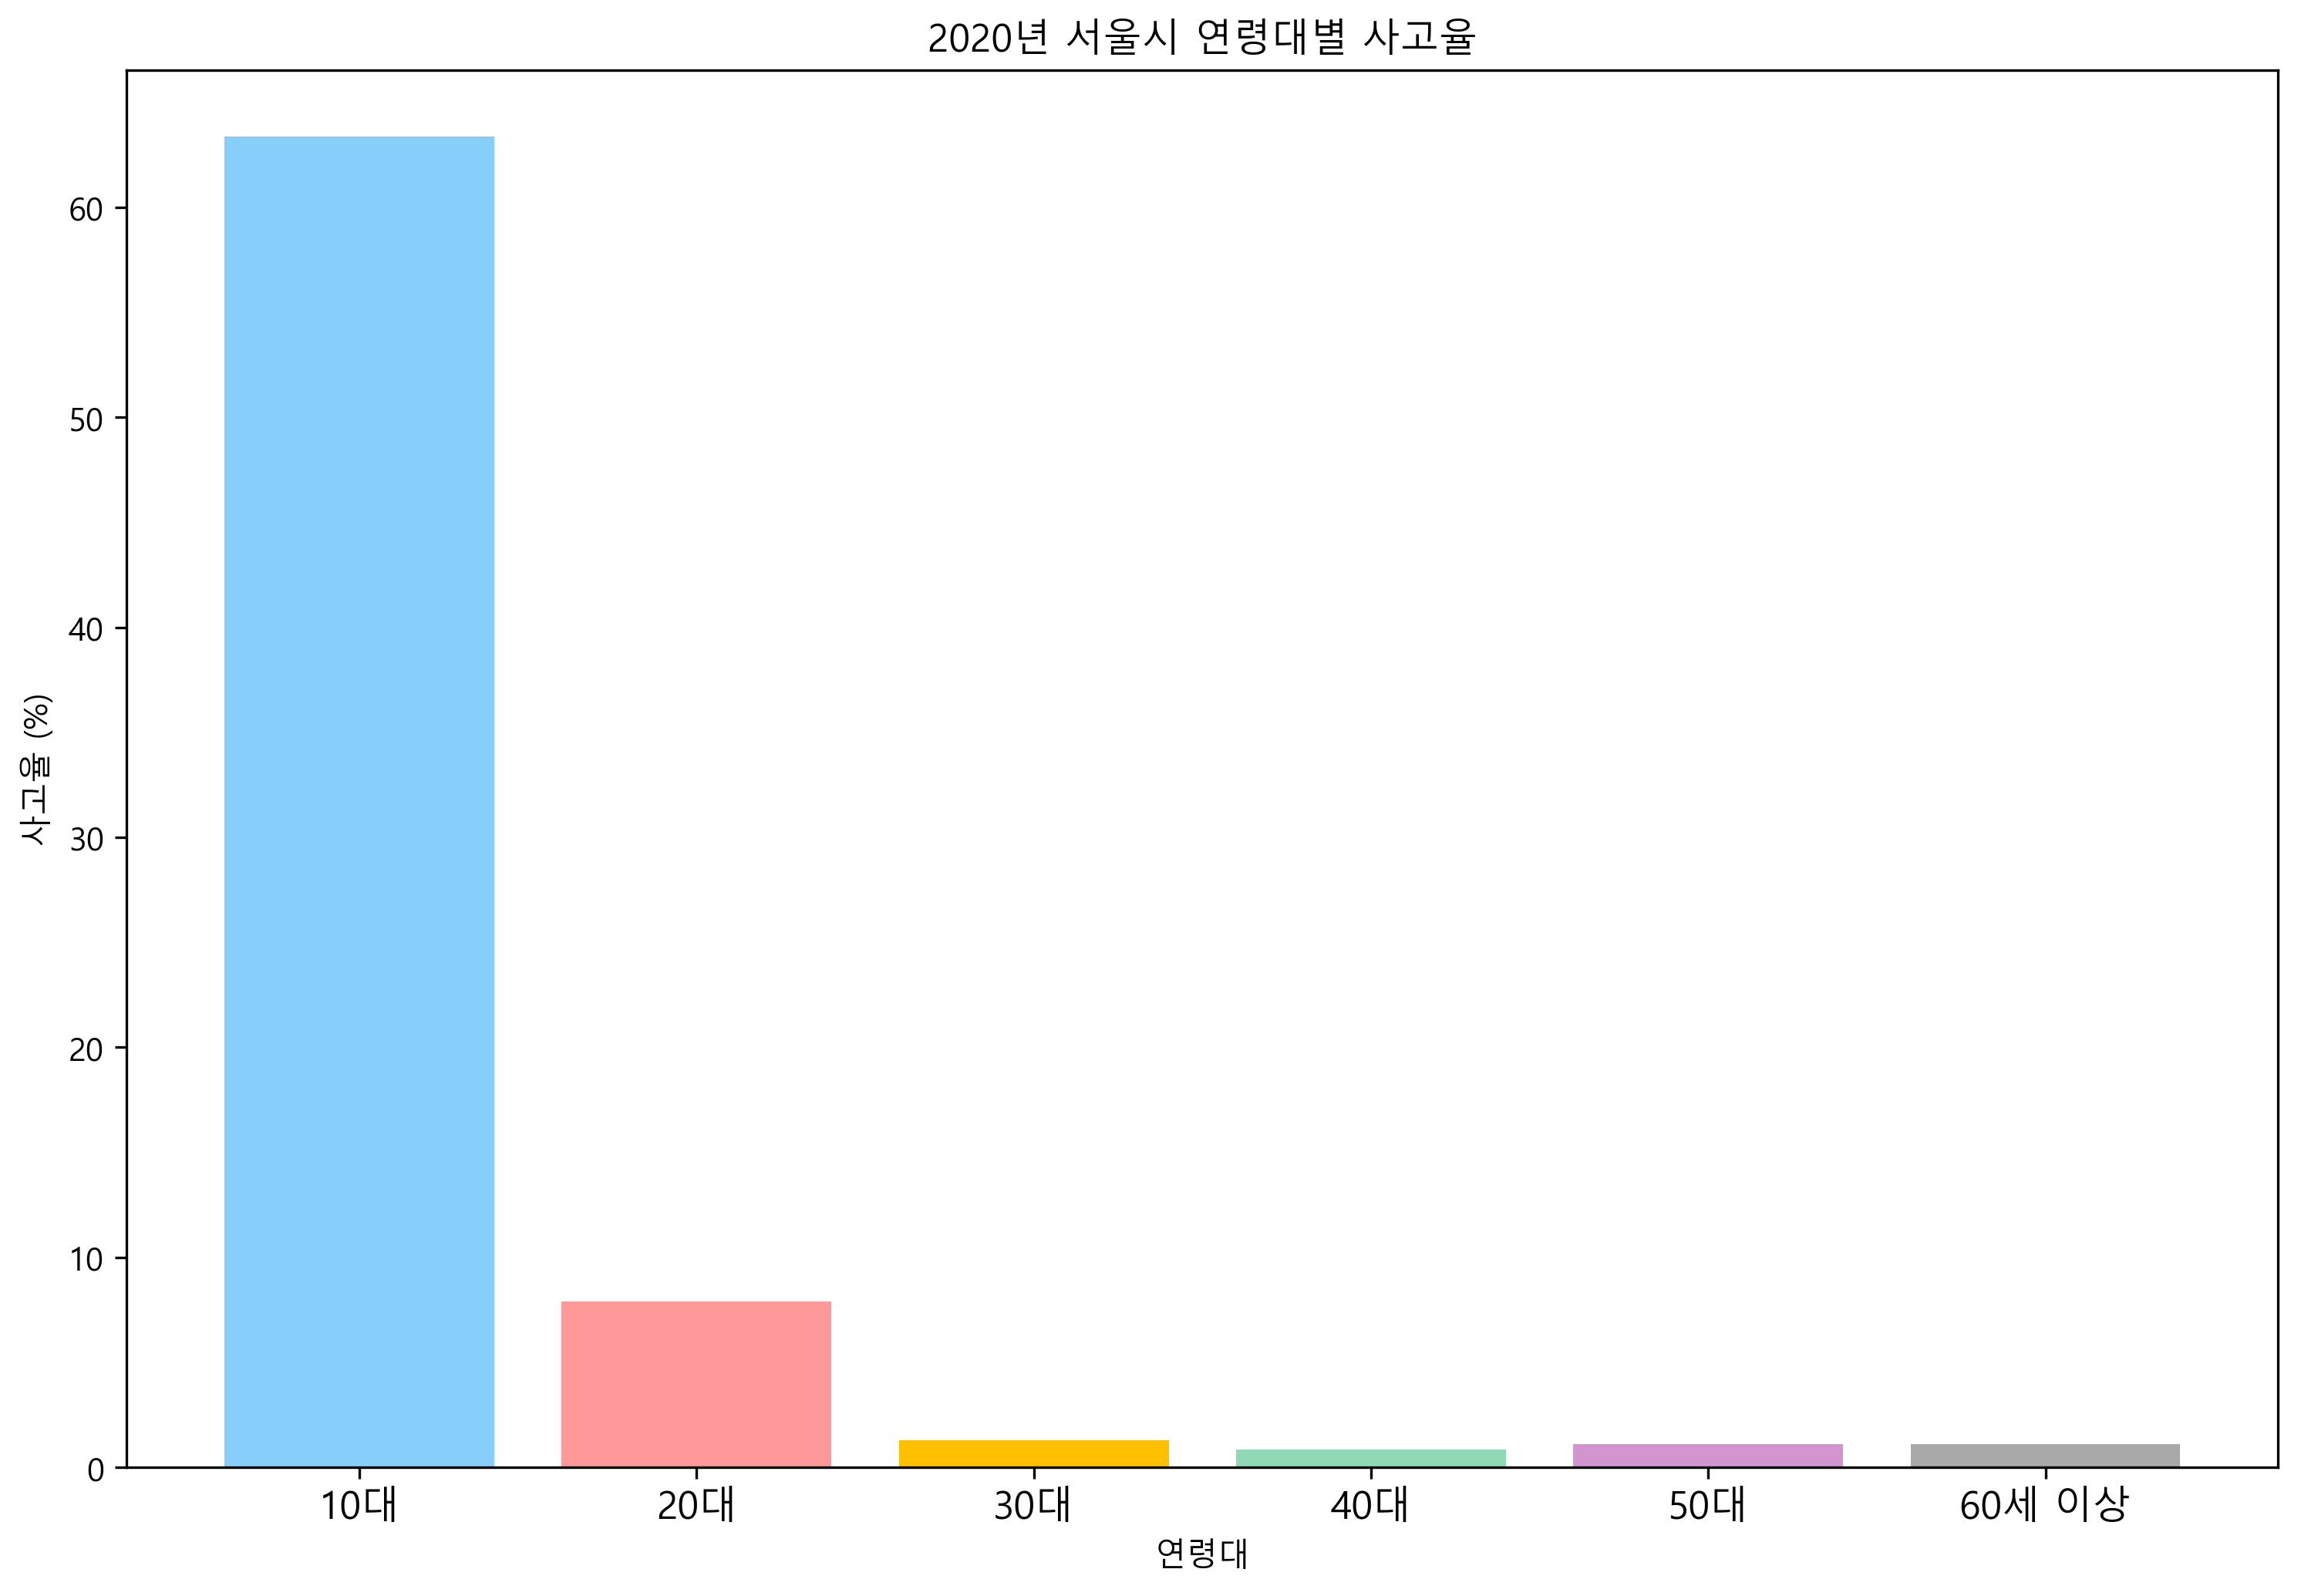

In [37]:
# 사고건수/자동차등록대수 

label = ['10대', '20대', '30대', '40대', '50대', '60세 이상']
color = ['lightskyblue', '#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'darkgrey']
index = np.arange(len(label))

plt.figure(figsize=(12, 8), dpi=300)
plt.bar(label, driver2020_seoul['사고율'], color=color)
plt.title('2020년 서울시 연령대별 사고율')
plt.xlabel('연령대')
plt.ylabel('사고율 (%)')
plt.xticks(index, label, rotation=0, fontsize=12)
plt.show()

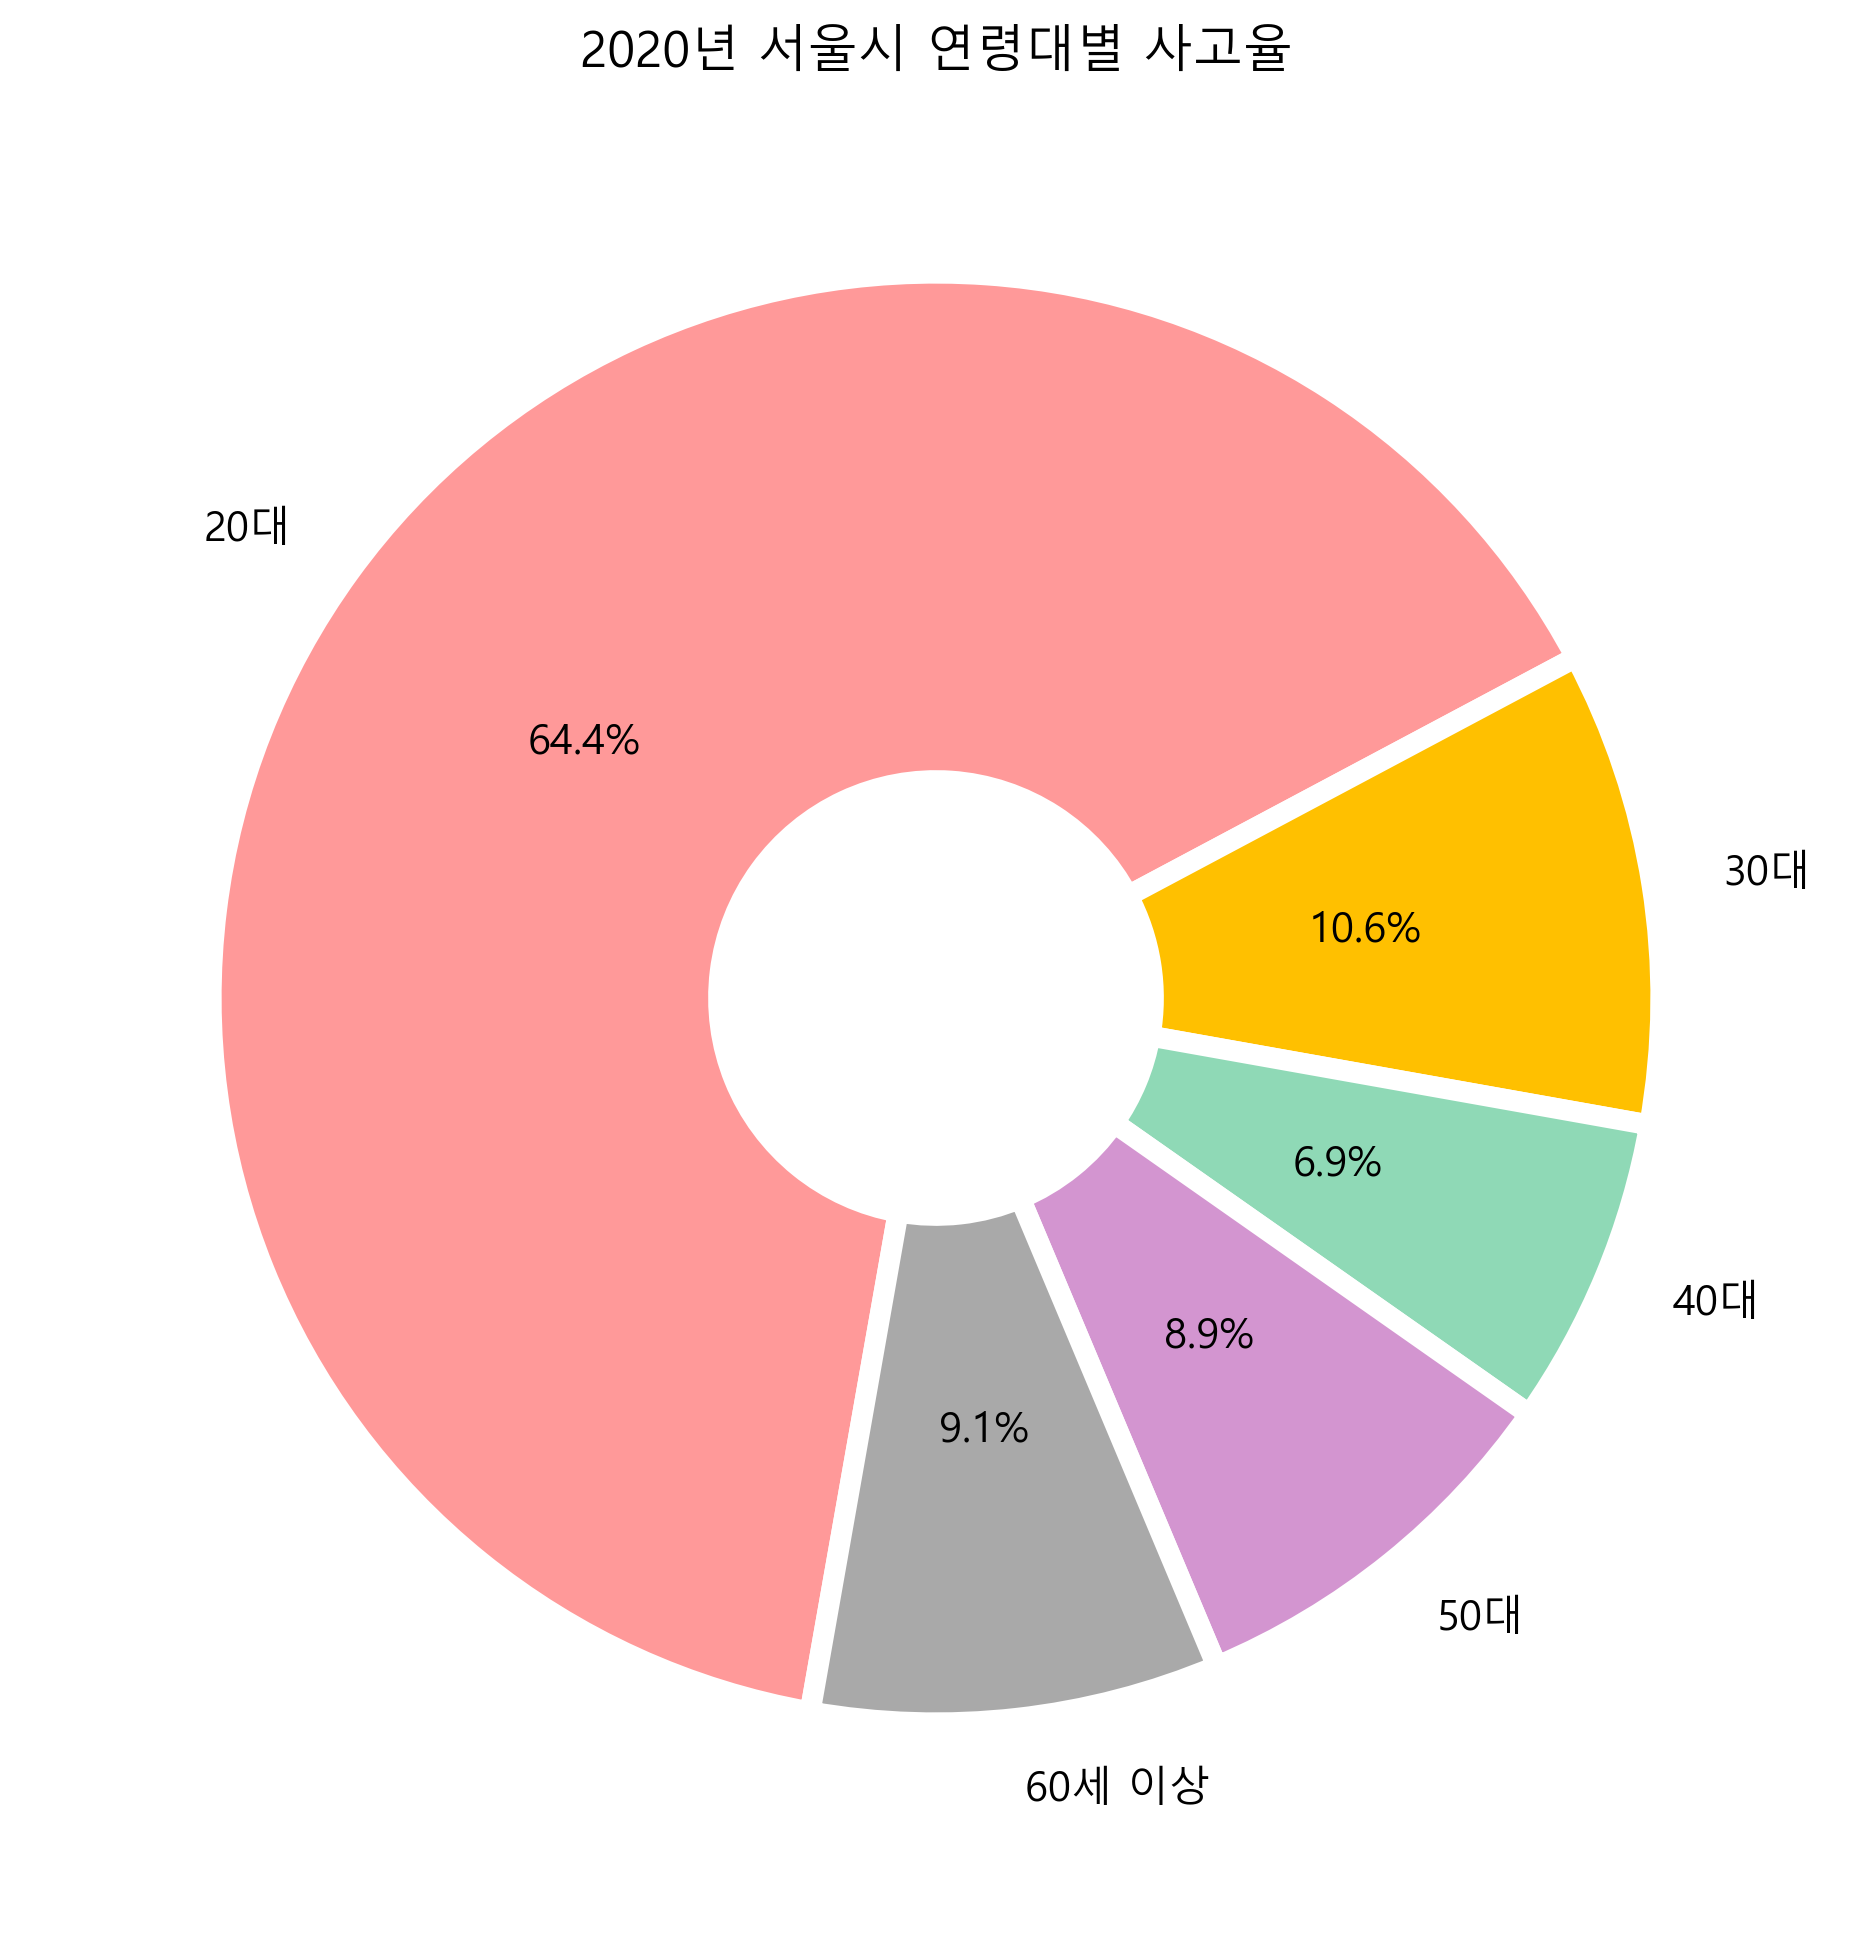

In [40]:
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'darkgrey']

 
plt.figure(figsize=(12, 8), dpi=300)
plt.pie(driver2020_seoul['사고율'][1:6], labels=driver2020_seoul['age'][1:6], autopct='%.1f%%', startangle=260, counterclock=False, 
        wedgeprops=wedgeprops, colors=colors)

plt.title('2020년 서울시 연령대별 사고율')

# plt.savefig('1.jpg')

In [39]:
import plotly.graph_objs as go

plt.figure(figsize=(12, 8), dpi=300)
fig = go.Figure(data=[
    go.Scatter(x=label, y=driver2020_seoul['사고율'], name='2020년 사망률', marker_color='red')
])
fig.update_layout(title='<b>2020년 전국 시간대별 교통사고 사망률</b>')
fig.update_xaxes(title_text='<b>연령대</b>')
fig.update_yaxes(title_text='<b>사고율 (%)</b>')
fig.show()

<Figure size 3600x2400 with 0 Axes>

In [14]:
print('10대: ', round(driver2020_seoul['사고율'][0], 2),'%')
print('20대: ', round(driver2020_seoul['사고율'][1], 2),'%')
print('30대: ', round(driver2020_seoul['사고율'][2], 2),'%')
print('40대: ', round(driver2020_seoul['사고율'][3], 2),'%')
print('50대: ', round(driver2020_seoul['사고율'][4], 2),'%')
print('60세 이상: ', round(driver2020_seoul['사고율'][5], 2),'%')

10대:  63.36 %
20대:  7.89 %
30대:  1.3 %
40대:  0.85 %
50대:  1.09 %
60세 이상:  1.11 %


### 결론
- 두 그래프의 결과로, 10대의 차량 사고율이 다른 연령대들에 비해 압도적으로 높았고, 사고율이 20대부터 40대까지 점진적으로 감소하다가 50대부터 다시 상승하는 형태를 보임.

- 단순히 운전면허등록수로 사고율을 나타냈을 때는, 10대를 제외하곤 각 연령대들은 사고율의 큰 차이가 없었다. 하지만, 자동차소유수로 사고율을 표현했을 때는, 20대의 사고율이 다른 연10대를 제외엔 다른 연령대들에 비해 사고율이 최소 6배 이상 높았다.

### 왜 이런 결과가?
- 20대 운전자들이 운전면허를 취득할 때 실내 기능시험 위주로 교육을 받아 실제 도로상황에 익숙하지 않아 이같은 결과가 나온 것으로 분석. 특히 자동차 면허 취득 교육시 야간 주행 교육이 충분히 이뤄지지 않는 것도 사고율을 높이는 요인.

- 20대 운전자가 면허를 따는 즉시 차량을 구매하지 못해 운전기량을 유지하지 못하는 것도 사고율을 늘리는 원인.

- 관련기사 링크: https://m.khan.co.kr/economy/economy-general/article/201510121507001#c2b

- 10대들은 왜 이렇게 사고율이 높을까?

In [15]:
import os
path = os.getcwd()
print(path)

C:\Users\NT900X3T-K58L\python\Data Science\project
